In [94]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [95]:
# Data collecting and processing
Titanic_data = pd.read_csv('/content/tested.csv')
Titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
#Number of rows and coulmns
Titanic_data.shape

(418, 12)

In [97]:
#Getting Some information about data
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [98]:
#Check the number of missing values in each coulmn
Titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [99]:
#Drop the 'cabin' coulmn from dataframe
Titanic_data = Titanic_data.drop(columns='Cabin' , axis= 1)

In [100]:
#Finding the mode value of 'Embarked' coulmn
print(Titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [101]:
print(Titanic_data['Embarked'].mode()[0])

S


In [102]:
#Getting some statistical measures about data
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [103]:
# Finding the number of people who survived
Titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [104]:
#Data Visualization
sns.set()

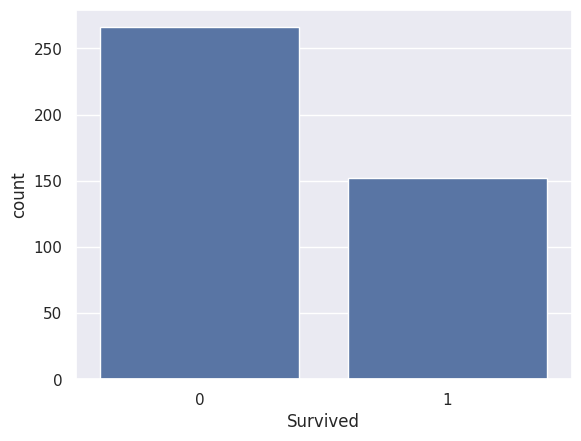

In [105]:
#Makaing count plot for survived people
new_var = sns.countplot(x='Survived', data = Titanic_data)

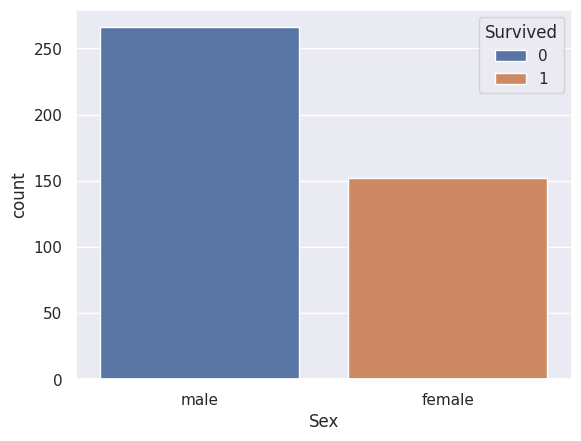

In [106]:
#Number of  survived people gender wise
new_var = sns.countplot(x='Sex',hue='Survived' ,data = Titanic_data)

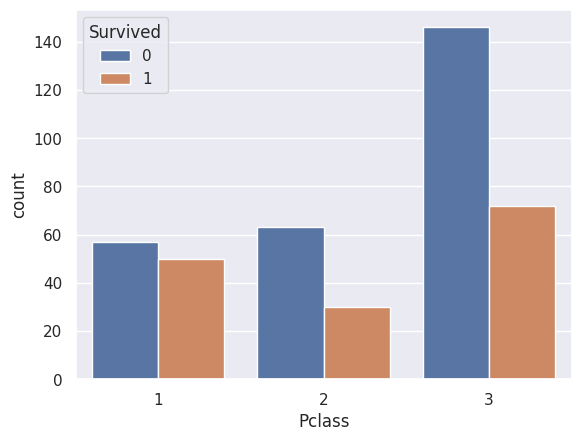

In [107]:
#Makaing count plot for pclass coulmn
new_var = sns.countplot(x='Pclass' ,hue = 'Survived', data = Titanic_data )

In [108]:
#Converting catagorical coulmns
Titanic_data.replace ({'Sex':{'male':0 ,'female':1},'Embarked':{'S':0,'Q':1,'C':2}}, inplace=True)
Titanic_data.head()

/tmp/ipython-input-4083248741.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Titanic_data.replace ({'Sex':{'male':0 ,'female':1},'Embarked':{'S':0,'Q':1,'C':2}}, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating Features and target

In [109]:
X=Titanic_data.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
Y=Titanic_data['Survived']
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         1
1         3    1  47.0      1      0    7.0000         0
2         2    0  62.0      0      0    9.6875         1
3         3    0  27.0      0      0    8.6625         0
4         3    1  22.0      1      1   12.2875         0
..      ...  ...   ...    ...    ...       ...       ...
413       3    0   NaN      0      0    8.0500         0
414       1    1  39.0      0      0  108.9000         2
415       3    0  38.5      0      0    7.2500         0
416       3    0   NaN      0      0    8.0500         0
417       3    0   NaN      1      1   22.3583         2

[418 rows x 7 columns]


In [110]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting the data into training data and testing data

In [111]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape ,X_train.shape ,Y_train.shape)

(418, 7) (334, 7) (334,)


Fill Missing Values Before Training

In [112]:
from sklearn.impute import SimpleImputer
import numpy as np

# Numerical columns only
numerical_cols = X_train.select_dtypes(include=[np.number]).columns

imputer = SimpleImputer(strategy='median')

X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])


Logestic Regression model

In [113]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

Model Evaluation

In [114]:
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print(classification_report(Y_test, Y_pred))


Accuracy: 1.0
[[51  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Conclusion:

The Logistic Regression model performed well on the Titanic dataset.
The results demonstrate successful preprocessing, model training, and evaluation.
This project showcases end-to-end data analysis and machine learning workflow.

